# Plotting flooding data

Now we have our `.tif` file written out for a single country. We want to transform this data first to a shapefile. 

In the following example, you can use this code "out of the box" in order to convert your raster file into a shapefile. 

The code reads in the `.tif` and uses `rasterio.features.shapes(array)` to obtain information for each tile. If the tile has a flooding value over 0 and under 255, then we write the coordinates to the `.shp` file. 

In [10]:
# Example
import os
import json
import rasterio
from rasterio.mask import mask
import pandas
import geopandas 

path = os.path.join('..', 'data', 'countries.csv')
countries = pandas.read_csv(path, encoding='latin-1')

for idx, country in countries.iterrows():
    
    if not country['iso3'] == 'RWA': # if the current country iso3 does not match RWA...
        continue                     # continue in the loop to the next country 
    
    iso3 = country['iso3']
    
    folder = os.path.join('..', 'data', 'processed', iso3, 'hazards', 'inunriver')
    if not os.path.exists(folder):
        os.mkdir(folder)
    filename = 'inunriver_rcp8p5_MIROC-ESM-CHEM_2080_rp01000.shp'
    path_out = os.path.join(folder, filename)

    folder = os.path.join('..', 'data', 'processed', iso3, 'hazards', 'inunriver')
    if not os.path.exists(folder):
        os.mkdir(folder)
    filename = 'inunriver_rcp8p5_MIROC-ESM-CHEM_2080_rp01000.tif'
    path_in = os.path.join(folder, filename)

    with rasterio.open(path_in) as src:

        affine = src.transform
        array = src.read(1)

        output = []

        for vec in rasterio.features.shapes(array):

            if vec[1] > 0 and not vec[1] == 255:

                coordinates = [i for i in vec[0]['coordinates'][0]]

                coords = []

                for i in coordinates:

                    x = i[0]
                    y = i[1]

                    x2, y2 = src.transform * (x, y)

                    coords.append((x2, y2))

                output.append({
                    'type': vec[0]['type'],
                    'geometry': {
                        'type': 'Polygon',
                        'coordinates': [coords],
                    },
                    'properties': {
                        'value': vec[1],
                    }
                })

    output = geopandas.GeoDataFrame.from_features(output, crs='epsg:4326')
    output.to_file(path_out, driver='ESRI Shapefile')


D:\Anaconda\envs\ga\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Now you have your shapefile data layer in place, we can begin to plot that code.  

We will need our plotting packages.

In [11]:
# Example
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as cx

First, we need to set up our plotting interface.

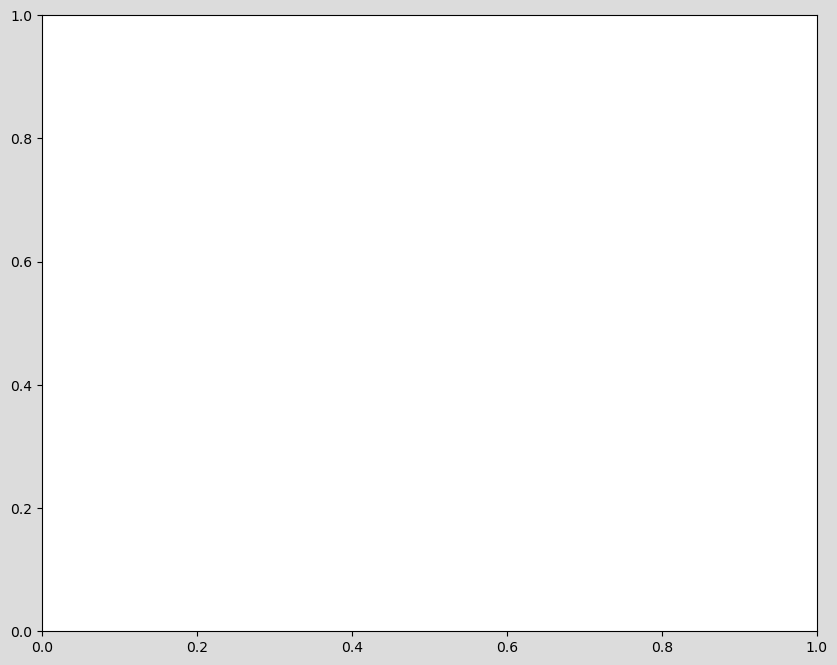

In [12]:
# Example
# Setup fig and axes, and define plot size
fig, ax = plt.subplots(1, 1, figsize=(10, 8)) 
fig.set_facecolor('gainsboro')

Set the path for our shapefile data.

In [13]:
# Example
folder = os.path.join('..', 'data', 'processed', 'RWA', 'hazards', 'inunriver')
filename = 'inunriver_rcp8p5_MIROC-ESM-CHEM_2080_rp01000.shp'
path_in = os.path.join(folder, filename)
path_in

'..\\data\\processed\\RWA\\hazards\\inunriver\\inunriver_rcp8p5_MIROC-ESM-CHEM_2080_rp01000.shp'

Load in our shapefile data.

<AxesSubplot:>

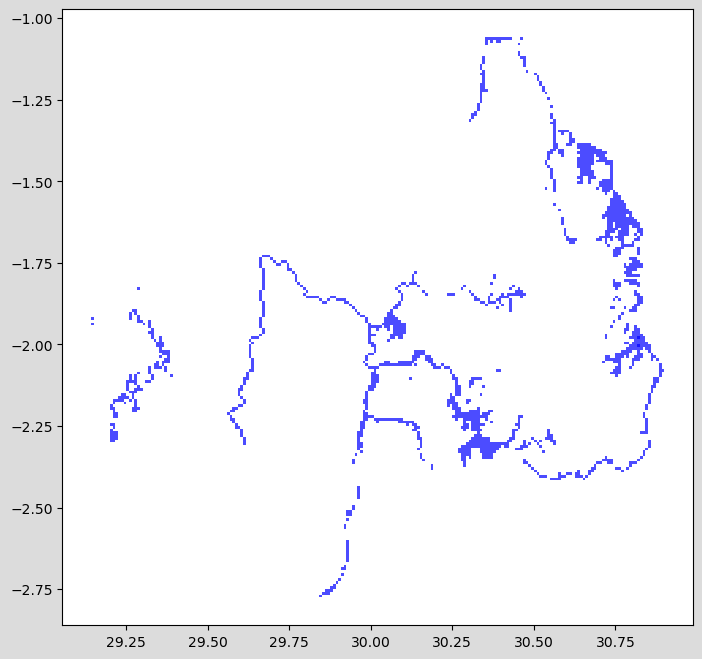

In [14]:
# Example 

# Setup fig and axes, and define plot size
fig, ax = plt.subplots(1, 1, figsize=(10, 8)) 
fig.set_facecolor('gainsboro')

# Import hazard and plot 
hazard = geopandas.read_file(path_in, crs='epsg:3857') 
hazard = hazard.to_crs(4326)
hazard.plot(color='blue', linewidth=1.5, alpha=.7, legend=True, edgecolor=None, ax=ax)

We will want to add a `contextily` basemap.

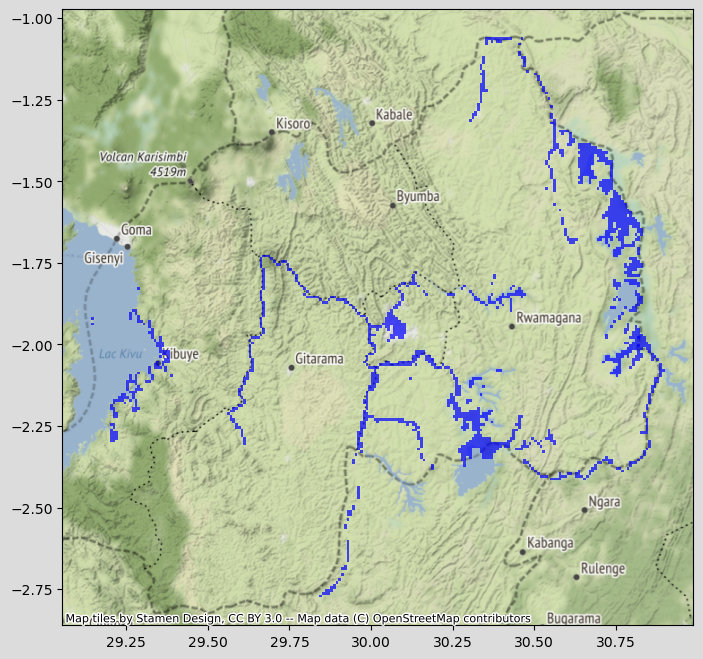

<Figure size 640x480 with 0 Axes>

In [15]:
# Example
cx.add_basemap(ax, crs='epsg:4326')
fig

And create a title for our plot.

Text(0.5, 0.98, 'Projected River Flooding:\nRWA, inunriver, rcp8p5, MIROC-ESM-CHEM, 2080, rp01000')

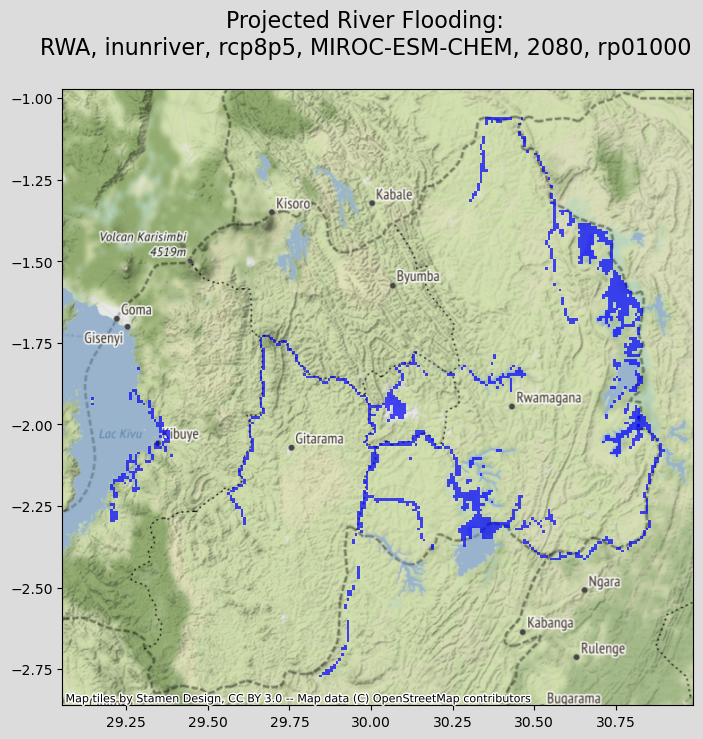

In [16]:
# Example

# Setup fig and axes, and define plot size
fig, ax = plt.subplots(1, 1, figsize=(10, 8)) 
fig.set_facecolor('gainsboro')

# Import hazard and plot 
hazard = geopandas.read_file(path_in, crs='epsg:3857') 
hazard = hazard.to_crs(4326)
hazard.plot(color='blue', linewidth=1.5, alpha=.7, legend=True, edgecolor=None, ax=ax)

cx.add_basemap(ax, crs='epsg:4326') #add the map baselayer

# Subset scenario strings for title
hazard_type = filename.split('_')[0]
scenario = filename.split('_')[1]
model = filename.split('_')[2]
year = filename.split('_')[3]
return_period = filename.split('_')[4]
return_period = return_period.replace('.shp', '')

# Insert scenario strings in title
main_title = 'Projected River Flooding:\n{}, {}, {}, {}, {}, {}'.format(
    'RWA', hazard_type, scenario, model, year, return_period
)
plt.suptitle(main_title, fontsize=16, wrap=True)

Finally, we can write out our figure:

In [17]:
# Example

# Setup fig and axes, and define plot size
fig, ax = plt.subplots(1, 1, figsize=(10, 8)) 
fig.set_facecolor('gainsboro')

# Import hazard and plot 
hazard = geopandas.read_file(path_in, crs='epsg:3857') 
hazard = hazard.to_crs(4326)
hazard.plot(color='blue', linewidth=1.5, alpha=.7, legend=True, edgecolor=None, ax=ax)

cx.add_basemap(ax, crs='epsg:4326') #add the map baselayer

# Subset scenario strings for title
hazard_type = filename.split('_')[0]
scenario = filename.split('_')[1]
model = filename.split('_')[2]
year = filename.split('_')[3]
return_period = filename.split('_')[4]
return_period = return_period.replace('.shp', '')

# Insert scenario strings in title
main_title = 'Projected River Flooding:\n{}, {}, {}, {}, {}, {}'.format(
    'RWA', hazard_type, scenario, model, year, return_period
)
plt.suptitle(main_title, fontsize=16, wrap=True)

# Specify path out
filename = 'inunriver_rcp8p5_MIROC-ESM-CHEM_2080_rp01000.png'
path_out = os.path.join('..', 'data', 'processed', 'RWA', filename)

# Export image to path
plt.savefig(path_out)
plt.close()

print('Figure processing complete')

Figure processing complete


# Exercise 1.4

Try generate a map for Grenada.

Convert the flood layer color to black. 